## Final Project Submission

Please fill out:
* Student name: Hilary Simiyu
* Student pace: full time
* Scheduled project review date/time: 
* Instructor name: Nikita Njoroge
* Blog post URL:


# LOAN APPROVAL ANALYSIS FOR THE BANK OF INDIA

## Business Understanding

### Overview
The loan approval project aims to develop a predictive model that can reliably assess an applicant's chances of getting a loan based on their financial and personal characteristics. This approach uses machine learning algorithms and historical data to improve and automate decision-making. By analyzing patterns and trends within the data, the model can provide reliable recommendations, thus aiding the Bank of India, the stakeholder of this project, in reducing the time and resources spent on manual evaluations and improving the consistency of loan approval decisions.

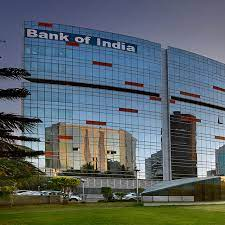

#### Challenges
The major challenge in developing a loan approval model is the high reliance on high quality data whereby incomplete and inaccuarate data can lead to unrealiable predictions.Additionally, ensuring the model complies with regulatory requirements and ethical considerations, such as preventing discriminatory biases, presents a significant challenge. Also ensuring a balance between the model's complexity and interpretability ia a challange as we have to ensure the stakeholders are able to understand the model but also maintain a bit of complexity for better results.

#### Proposed Solution
The proposed Solution is to create a model with a target accuaracy score of 80% by training it on comprehensive data based on previous applicants such as the employment status and income level.To address the data isues , extensive data preprocessing will be employed with regular bias detection along the way to ensure the model remains fair.The model will be tailored to meet specific business needs and regulatory frameworks for the Bank of India as the key stakeholder

In conclusion, the loan approval project aims to significantly enhance the efficiency and accuracy of the loan approval process through advanced machine learning techniques. Faced with challenges such as data quality, the proposed solution focuses on achieving a balance between performance and interpretability. With an accuracy target of 80%, the model is expected to provide reliable predictions that can streamline bank operations, reduce approval times, and maintain fair lending practices. By addressing these challenges and implementing a robust evaluation framework, the project aspires to deliver a valuable tool for banks, including the Bank of India, ensuring its alignment with their operational goals and regulatory requirements.

### Problem Statement
With adavancement in technology and increased competition, The Bank of India wishes to  enhance its loan approval process by developing a predictive model that accurately determines the likelihood of loan approval for applicants.By moving away from manual evaluations to more data-driven solutions to enure faster and reliable decisions.This model will rely on previous customers data and identify patterns from there and predict approval outcomes.The key challenge is to develop a model that not only achieves high accuracy but also adheres to regulatory standards and maintains ethical lending practices.


### Objectives
 * To create a machine learning model that can accurately predict the likelihood of loan approval for applicants
 * To achieve a target accuracy score of 80% for the predictive model, ensuring reliable predictions that aid in  decision-making.
 * To use insights from the Model to automate the loan approval system based on the best features

## Data Understanding

For this project, we will make use of the Loan Approval Dataset sourced from Kaggle.The dataset has comprehensive information regarding a loan applicant's financial status, personal attributes such as age and marital status.The dataset has a blend of both numerical and categorical features making it suitable for machine learning models and produce good models that can be adopted into use later on.


The rows represent a loan applicant in India and the columns in the dataset are:
 * Id: Unique identifier for each loan applicant.
 * Income: The income level of the applicant.
 * Age: Age of the applicant.
 * Experience: Years of professional experience.
 * Married/Single: Marital status of the applicant.
 * House_Ownership: Indicates whether the applicant owns or rents a house.
 * Car_Ownership: Indicates whether the applicant owns a car.
 * Profession: Occupation or profession of the applicant.
 * CITY: City of residence of the applicant.
 * STATE: State of residence of the applicant.
 * CURRENT_JOB_YRS: Duration of employment in the current job.
 * CURRENT_HOUSE_YRS: Duration of residence in the current house.
 * Risk_Flag: Binary indicator of loan risk, where 1 represents a flagged risky applicant and 0 represents a non-risky applicant.

####  Import the Necessary Libraries and Dependancies

In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import  GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score, KFold

from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#Import the classes from the functions module
from functions import Loading, Cleaning, Preprocessing, Analysis, Modeling, Evaluation

Creating an instance of the classes to be used

In [2]:
loader = Loading()

cleaner = Cleaning()

preprocessor = Preprocessing()

analyser = Analysis()

modeler = Modeling()

evaluator = Evaluation()


In [3]:
#Using the load_data attribute
loan_data = loader.load_data('Data\loan_approval_dataset.json')

#display first 5 rows
loan_data.head()

The dataset contains 252000 loan applicants with 13 attributes

<class 'pandas.core.frame.DataFrame'>
Int64Index: 252000 entries, 0 to 251999
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Id                 252000 non-null  int64 
 1   Income             252000 non-null  int64 
 2   Age                252000 non-null  int64 
 3   Experience         252000 non-null  int64 
 4   Married/Single     252000 non-null  object
 5   House_Ownership    252000 non-null  object
 6   Car_Ownership      252000 non-null  object
 7   Profession         252000 non-null  object
 8   CITY               252000 non-null  object
 9   STATE              252000 non-null  object
 10  CURRENT_JOB_YRS    252000 non-null  int64 
 11  CURRENT_HOUSE_YRS  252000 non-null  int64 
 12  Risk_Flag          252000 non-null  int64 
dtypes: int64(7), object(6)
memory usage: 26.9+ MB
None


,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
1,2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
2,3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
3,4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
4,5,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1


The dataset contains 13 columns, each representing a distinct personal attribute, and 252,000 rows, with each row corresponding to a loan application.
This dataset has a mix of various datatypes: Id, Income, Age, Experience, Current job years, Current House years and Risk Flag as integers(int64)to facilitate mathematical computations and the rest as objects to accommodate text-based categories.



In [5]:
loader.stats(loan_data)


Risk_Flag value counts:
0 (No Risk):  221004
1 (Risk):  30996


,Id,Income,Age,Experience,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
count,252000.000000,2.520000e+05,252000.000000,252000.000000,252000.000000,252000.000000,252000.000000
mean,126000.500000,4.997117e+06,49.954071,10.084437,6.333877,11.997794,0.123000
std,72746.278255,2.878311e+06,17.063855,6.002590,3.647053,1.399037,0.328438
min,1.000000,1.031000e+04,21.000000,0.000000,0.000000,10.000000,0.000000
25%,63000.750000,2.503015e+06,35.000000,5.000000,3.000000,11.000000,0.000000
50%,126000.500000,5.000694e+06,50.000000,10.000000,6.000000,12.000000,0.000000
75%,189000.250000,7.477502e+06,65.000000,15.000000,9.000000,13.000000,0.000000
max,252000.000000,9.999938e+06,79.000000,20.000000,14.000000,14.000000,1.000000


* One thing to note is that the Risk flag class has imbalanced weights, for better results we'll have to pass a class_weight parameter when modeling

* *Income* - mean, minimum and maximum income of the loan applicants is  :  4.9million, 10,310  and 9.9 million

 Based on the maximum and minimum values we can get a hint that there are outliers in this column
* *Age* - mean, minimum and maximum age of the loan applicants is: 50years, 21years and 79 years
* *Experience* - mean, minimum and maximum years of professional experience is : 10years, no experience and 20 years
* *CURRENT_JOB_YRS* - the applicant who's maintained their current job the longest has 14years there and the least is not employed yet
* *CURRENT_HOUSE_YRS* - there is an applicant who has lived in one house for 14 years(most) and another for 10 years(least)

## Data Cleaning And Analysis

After getting an overview of what the dataset contains let's move on to clean it but first identify the issues with it

In [6]:
cleaner.identify_issues(loan_data)

{'missing_values': Id                   0
 Income               0
 Age                  0
 Experience           0
 Married/Single       0
 House_Ownership      0
 Car_Ownership        0
 Profession           0
 CITY                 0
 STATE                0
 CURRENT_JOB_YRS      0
 CURRENT_HOUSE_YRS    0
 Risk_Flag            0
 dtype: int64,
 'duplicate_rows': 0,
 'null_values': Id                   0
 Income               0
 Age                  0
 Experience           0
 Married/Single       0
 House_Ownership      0
 Car_Ownership        0
 Profession           0
 CITY                 0
 STATE                0
 CURRENT_JOB_YRS      0
 CURRENT_HOUSE_YRS    0
 Risk_Flag            0
 dtype: int64}

The dataset doesn't have any missing, null or duplicate values. 

We will include the outliers in our analysis since they may help to create a real life scenario where some applicants have higher income than others and help in detecting some important pattern in the project

Moving to the Analysis


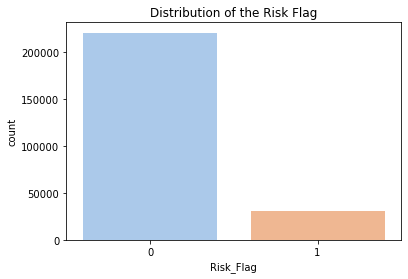

In [7]:
analyser.target_analysis(loan_data)

From the count display above of the Risk Flag column we can deduce that more  are flagged as non risky

#### a) Univariate Analysis

The categorical columns suitable for analysis are the *Married/single*, *House_ownership* and *Car_ownership* columns

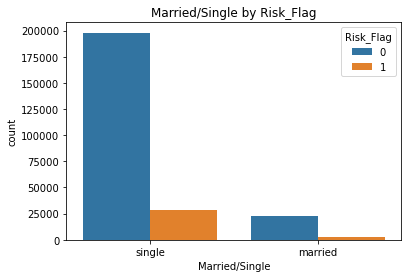

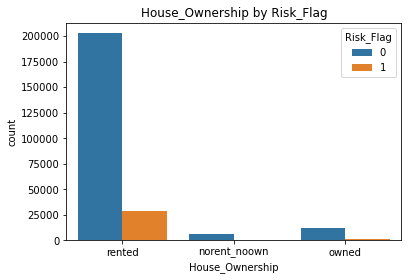

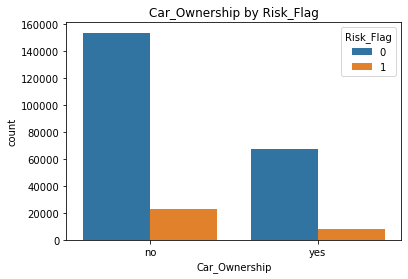

In [8]:
#create a column list of the above columns
cat_columns = ['Married/Single', 'House_Ownership', 'Car_Ownership']

analyser.category_by_target(cat_columns, loan_data)

 * Most of the cases are flagged as non risky from the various visuals above
 
 * Most of the loan applicants from our dataset are single with married ones less than 50,000
 
 * Most of the loan applicants live in rented houses and less than 10,000 live in owned houses

 * From the last visual, most loan applicants don't own a car

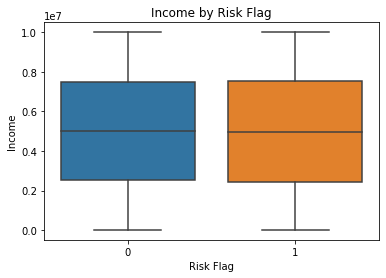

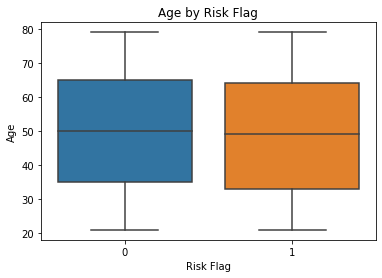

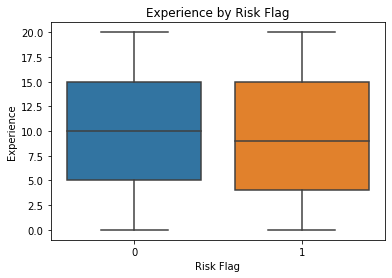

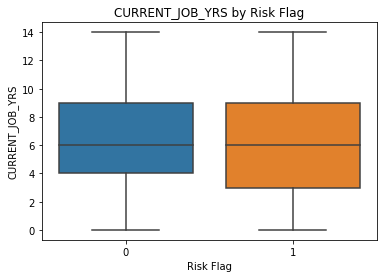

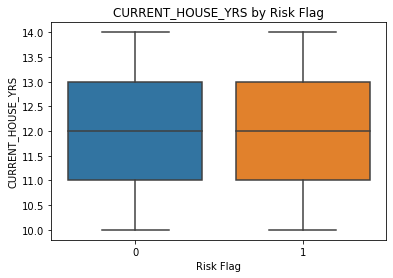

In [9]:
num_columns = ['Income', 'Age', 'Experience', 'CURRENT_JOB_YRS',
               'CURRENT_HOUSE_YRS']
analyser.numerical_analysis(num_columns, loan_data)

* The boxes for Risk Flag 0 and Risk Flag 1 are not significantly different showing there isn't a difference in the income distribution between the two groups.The median income is about 0.5 million

* For the age boxplot, there is  a slight variation in the width of the boxes showing younger applicants are more likely to be flagged as risky applicants

* Applicants with more professional experience are deemed as non risky with the median years of experience overlapping between the two groups

* The median current job years is 6years having applicants with short job tenures being flagged as risky applicants

* For the current years an aplicant has resided in a house, the median is 12years, having no difference in the distribution within the two groups



#### b) Multivariate Analysis

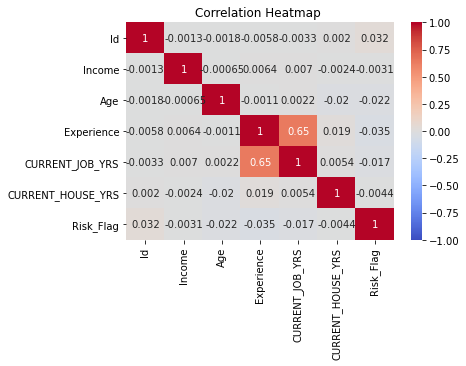

In [10]:
analyser.correlation_map(loan_data)

The only attributes having a strong correlation are *Experience* and *Current Job Years* , the rest have weak correlatins to each other

## Modeling

Six models were created for this project. The LogisticRegression was used as baseline. We designed DecisionTreeClassifier, RandomForestClassifier, and XGBoost models, with iterations on the parameters for the DecisionTree.

In [4]:
# Split the data into features (X) and target variable (y)
X = loan_data.drop(columns=["Risk_Flag"])
y = loan_data["Risk_Flag"]

### a) Logistic Regression



To avoid data leakage we'll split the dataset into train and test and perform some preprocessing on it

The baseline model is a simple Logistic Regression which we will use to also iterate through some test sizes to find the best testsize for splitting our data

In [7]:
logreg = LogisticRegression(fit_intercept=False, C=1e12, solver='liblinear', random_state=42)

best_test_size = 0
best_accuracy = 0

for size in [0.2, 0.25, 0.3, 0.4]:
    X_train, X_test, y_train, y_test = preprocessor.prep(X, y, size)
    test_accuracy = modeler.models(logreg, X_train, y_train, X_test, y_test)
    
    if test_accuracy > best_accuracy:
        best_accuracy = test_accuracy
        best_test_size = size

print(f"Best test size: {best_test_size} with accuracy: {best_accuracy*100:.2f}%")


The model has an accuracy of 55.66% on the test test
The Model has an accuracy of 56.02% on the train test

The model has an accuracy of 55.56% on the test test
The Model has an accuracy of 55.87% on the train test

The model has an accuracy of 55.67% on the test test
The Model has an accuracy of 55.82% on the train test

The model has an accuracy of 55.54% on the test test
The Model has an accuracy of 55.89% on the train test
Best test size: 0.3 with accuracy: 55.67%


The best test size is 30% for the remaining models we will use this.

The second Iteration of the Logistic Regression will have a penalty included and also balance the weights of the class

In [5]:
#Using a testsize of 30% for the remaining models
X_train, X_test, y_train, y_test = preprocessor.prep(X, y, 0.3)

In [6]:
logreg2 = LogisticRegression(class_weight='balanced',
                            penalty='l2',
                            fit_intercept=False,
                            C=1e12, solver='liblinear'
                            )

In [13]:
modeler.models(logreg2, X_train, y_train, X_test, y_test)    


The model has an accuracy of 52.02% on the test test
The Model has an accuracy of 52.41% on the train test


0.5201587301587302

In [16]:
modeler.cross_val(logreg2,X_train, y_train)

Cross-Validation Accuracy Scores: [0.52091837 0.51802721 0.51805556 0.51723356 0.51632653]
Mean Accuracy: 0.5181122448979594
Standard Deviation: 0.0015391965543351577


### b) Decision Trees

The second model will be a Desision Tree Classifier

In [8]:
clf = DecisionTreeClassifier()

In [14]:
modeler.models(clf, X_train, y_train, X_test, y_test) 


The model has an accuracy of 86.62% on the test test
The Model has an accuracy of 100.00% on the train test


0.8661607142857143

* Compared to the LogisticRegression the model is performing much better with an improved accuracy score
* However the model is overfitting to the train data, because of the large difference between the train and test score



In [19]:
modeler.cross_val(clf,X_train, y_train)

Cross-Validation Accuracy Scores: [0.86062925 0.8595805  0.86159297 0.86822562 0.86278345]
Mean Accuracy: 0.8625623582766441
Standard Deviation: 0.0030228977230841777


The second iteration will aplly hyperparameter optimization to reduce overfitting to the training data

In [9]:
#Second Iteration of Decision Tree
Clf2 = DecisionTreeClassifier(criterion='entropy',
                              class_weight='balanced',
                              max_depth = 4,
                              min_samples_split=5,
                              min_samples_leaf=3
                              )

In [15]:
modeler.models(Clf2, X_train, y_train, X_test, y_test) 


The model has an accuracy of 53.97% on the test test
The Model has an accuracy of 54.23% on the train test


0.539702380952381

In [22]:
modeler.cross_val(Clf2,X_train, y_train)

Cross-Validation Accuracy Scores: [0.53925737 0.54240363 0.53551587 0.55138889 0.5401644 ]
Mean Accuracy: 0.5417460317460318
Standard Deviation: 0.00530899247923606


### c) Random Forest

The next model will be a random forest which is an essemble of Decision Trees

In [10]:
forest = RandomForestClassifier(n_estimators=100 ,
                                max_depth = 5,
                                class_weight='balanced_subsample'
                                )

In [16]:
modeler.models(forest, X_train, y_train, X_test, y_test) 


The model has an accuracy of 69.23% on the test test
The Model has an accuracy of 69.56% on the train test


0.6922817460317461

In [25]:
modeler.cross_val(forest,X_train, y_train)

Cross-Validation Accuracy Scores: [0.69623016 0.69872449 0.69223356 0.69546485 0.68463719]
Mean Accuracy: 0.6934580498866213
Standard Deviation: 0.0048734835574324245


### d) XGBoost

Implementing gradient descent algorithm

In [11]:
Xg = XGBClassifier()

In [17]:
modeler.models(Xg, X_train, y_train, X_test, y_test) 


The model has an accuracy of 89.25% on the test test
The Model has an accuracy of 89.58% on the train test


0.8924900793650794

In [28]:
modeler.cross_val(Xg,X_train, y_train)

Cross-Validation Accuracy Scores: [0.89503968 0.8899093  0.89384921 0.89183673 0.89461451]
Mean Accuracy: 0.8930498866213151
Standard Deviation: 0.0019173572602240263


* The standard deviations from the cross validation from the accuracy scores are generally low for all the models indicating there is much variability amongst the different folds, showing the model's performance is consistent across all folds
* From the mean accuracy score, we get that the XG Boost model has the best mean accuracy score all 5 folds

We'll plot the ROC Curve for the models created

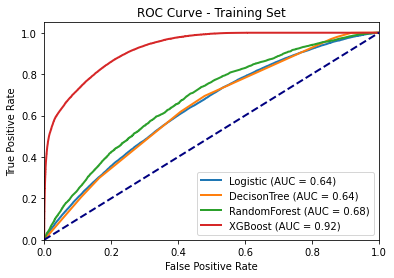

In [18]:
#Create a Dictionary to store the models
models = {'Logistic': logreg2, 'DecisonTree': Clf2, 'RandomForest': forest, 'XGBoost': Xg}

modeler.plot_curves(models, X_train, y_train)

The XGBoost model is closest to the top-left corner Indicating a better performing model.
The High TPR and low FPR, means the model is correctly identifying positives while minimizing false positives.

Followed closely by the Random Forest Model, Decision Tree classifier and Logistic Regression

## Evaluation

We'll evaluate the models by checking their metrics and also plotting a confusion matrix of the same

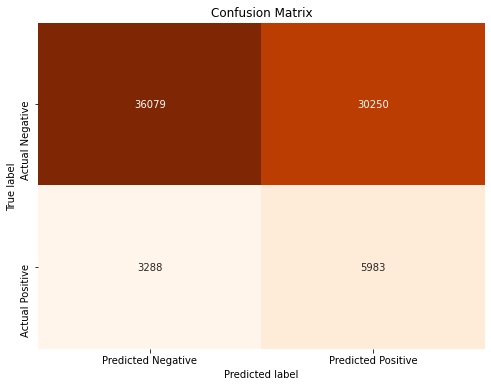

{'Precision': 0.16512571412800486,
 'Recall': 0.6453457016503074,
 'F1-score': 0.2629658931082982,
 'ROC-AUC': 0.6350329807162958}

In [37]:
#First LogisticRegression Model
evaluator.Evaluate(logreg, X_test, y_test)


 * Precision of 0.165 indicates that for all the instances the model predicted positive only 16.5% were actually positive
 * Recall of 0.645 indicates that the model detected 64.5% of all the positive instances
 * A low F1 score of 0.263 indicates that the model did not perform well
 * Since the ROC_AUC score is closer to above 0.5 it performed moderately


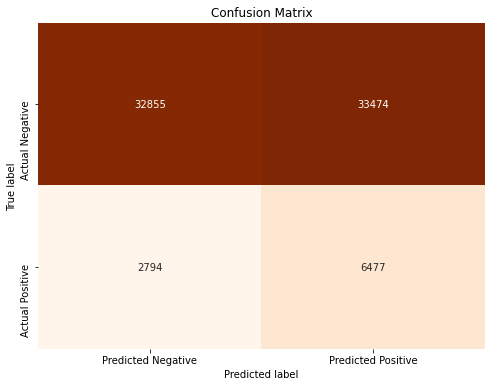

{'Precision': 0.16212360141172938,
 'Recall': 0.6986301369863014,
 'F1-score': 0.2631750030474178,
 'ROC-AUC': 0.636128556232778}

In [38]:
#Second LogisticRegression Model
evaluator.Evaluate(logreg2, X_test, y_test)

 * For all the instances the model predicted positive only 16.2% were actually positive
 * The model detected 69.8% of all positive instances
 * Similar to the baseline model, this model did not perform well based on the F1score
 * This model had a better ROC_AUC score than the baseline which is also above 0.5 indicating its better than a random guess

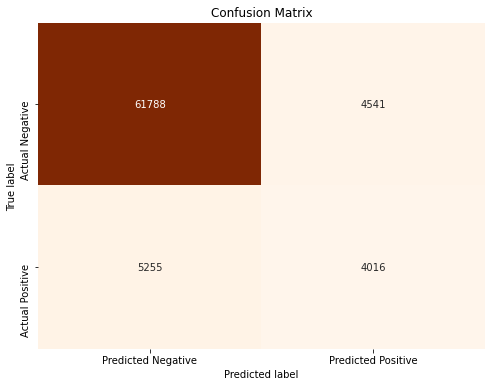

{'Precision': 0.4693233609910015,
 'Recall': 0.43317872937115737,
 'F1-score': 0.45052726048911823,
 'ROC-AUC': 0.6823584852813965}

In [39]:
#First DecionTreeClassifier 
evaluator.Evaluate(clf, X_test, y_test)

 * For all the instances the model predicted positive 47.3% were actually positive, better than the previous models
 * The model detected 43.6% of all positive instances
 * This model performed moderately well based on the F1score of 45.3% better than the previous models
 * This model had a better ROC_AUC score of 68.4% better than the previous models which is also above 0.5 indicating its better than a random guess

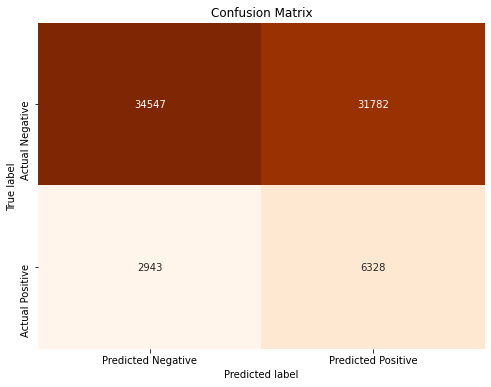

{'Precision': 0.16604565730779322,
 'Recall': 0.6825585158019631,
 'F1-score': 0.2671112893353876,
 'ROC-AUC': 0.6334692070042999}

In [40]:
#Second DecisionTreeClassifier
evaluator.Evaluate(Clf2, X_test, y_test)

 * For all the instances the model predicted positive only 16.6% were actually positive
 * The model detected 68.3% of all positive instances
 * Similar to the baseline model, this model did not perform well based on the F1score of 26.7%
 * This model had a ROC_AUC score of 63.3% better than the baseline which is also above 0.5 indicating its better than a random guess

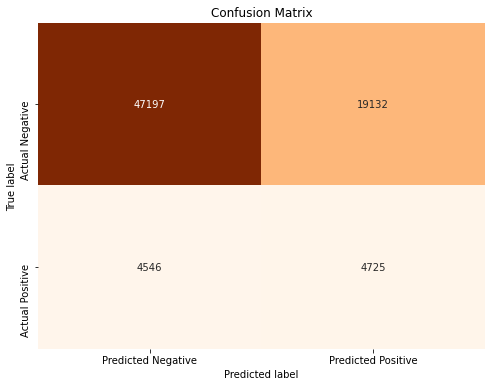

{'Precision': 0.1980550781741208,
 'Recall': 0.5096537590335455,
 'F1-score': 0.28525718425501084,
 'ROC-AUC': 0.6687080154283138}

In [41]:
#Random Forest Classifier
evaluator.Evaluate(forest, X_test, y_test)

 * For all the instances the model predicted positive only 19.8% were actually positive
 * The model detected 54.3% of all positive instances
 * Similar to the baseline model, this model did not perform well based on the F1score of 29% indicatin no balance between recall and precision
 * This model had a better ROC_AUC score than the baseline which is also above 0.5 indicating its better than a random guess

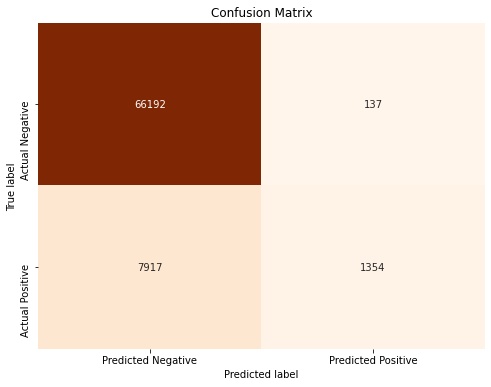

{'Precision': 0.9081153588195842,
 'Recall': 0.1460468126415705,
 'F1-score': 0.2516260918044973,
 'ROC-AUC': 0.9009773923539923}

In [42]:
#XGBoost Model
evaluator.Evaluate(Xg, X_test, y_test)

 * For all the instances the model predicted positive 90.8% were actually positive which is the highest so far
 * The model detected 14.6% of all positive instances
 * The model has  F1score of 25.1% indicating a rather moderate performance
 * This model had the best ROC-AUC score of 90% which indicates an almost accurate model

Based on all the metrics involved in the evaluation, XGBoost model has the best Accuracy score on the test set which  is relatively similar to the train set accuracy score indicating the model was not overfitting
It had the highest Precision score of 90% which shows that everytime the model predicted something as positive it was correct 90% of the time
With more iterations the XGboost model is the best to implement for an automatic loan approval system

## Recommendation

 * Conduct fairness analysis to prevent discrimination against any group and nsure the model complies with relevant regulations
 
 
 * Provide training for stakeholders and implement a feedback mechanism to improve the model continuously
 
 
 * Continuously monitor model performance post-deployment and Plan for regular updates and retraining with new data to maintain    accuracy and relevance.
 
 
 * Explore the use of advanced machine learning techniques like deep learning to further improve model accuracy and    continuously explore new features that can improve the predictive power of the model.